In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook

In [2]:
df = pd.read_csv('Foreign_Exchange_Rates.csv', 
                 usecols=[1,6], names=['Date', 'BRL/USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])
df['BRL/USD'] = pd.to_numeric(df['BRL/USD'], errors='coerce')
df.dropna(inplace=True)
df.head(10)

,BRL/USD
Date,
2000-01-03,1.8050
2000-01-04,1.8405
2000-01-05,1.8560
2000-01-06,1.8400
2000-01-07,1.8310
2000-01-10,1.8190
2000-01-11,1.8225
2000-01-12,1.8350
2000-01-13,1.8140


In [3]:
df_m = df.copy()
df_m['Month'] = [i.month for i in df_m.index]
df_m['Year'] = [i.year for i in df_m.index]
df_m = df_m.groupby(['Month', 'Year']).mean()
df_m

BRL/USD
Month Year          
1     2000  1.805735
      2001  1.956119
      2002  2.379905
      2003  3.437457
      2004  2.853300
...              ...
12    2015  3.880836
      2016  3.353967
      2017  3.294960
      2018  3.883356
      2019  4.104486

[240 rows x 1 columns]

In [4]:
df_m = df_m.unstack(level=0)
df_m

BRL/USD                                                              \
Month        1         2         3         4         5         6         7    
Year                                                                          
2000   1.805735  1.776500  1.742378  1.769625  1.827750  1.809864  1.798150   
2001   1.956119  2.006000  2.095523  2.193438  2.292568  2.378786  2.473095   
2002   2.379905  2.424189  2.345024  2.322682  2.475250  2.714375  2.941409   
2003   3.437457  3.595526  3.456738  3.109000  2.951690  2.888667  2.883273   
2004   2.853300  2.934237  2.906696  2.907886  3.102325  3.129295  3.038429   
2005   2.689450  2.597147  2.706100  2.576048  2.455376  2.414845  2.370235   
2006   2.266600  2.158716  2.152774  2.128100  2.169682  2.249295  2.188305   
2007   2.137567  2.093942  2.088268  2.030186  1.983550  1.932286  1.881195   
2008   1.770962  1.728995  1.709048  1.686345  1.658462  1.617919  1.589955   
2009   2.307935  2.322974  2.316095  2.202695  2.068895  1.958577  1.932809   
2010   1.781653  1.842005  1.785539  1.756782  1.814155  1.804200  1.768900   
2011   1.674525  1.666395  1.657352  1.583300  1.613610  1.585409  1.562510   
2012   1.785035  1.716800  1.795300  1.852248  1.981023  2.048195  2.029552   
2013   2.028110  1.972932  1.984214  2.001109  2.036473  2.173360  2.251832   
2014   2.385781  2.379200  2.325052  2.232473  2.219510  2.236019  2.224214   
2015   2.634620  2.816989  3.141373  3.042091  3.056205  3.111691  3.228809   
2016   4.055589  3.964385  3.698022  3.563448  3.540305  3.423445  3.278140   
2017   3.190084  3.105726  3.127530  3.138995  3.204277  3.295395  3.199410   
2018   3.211524  3.250653  3.278968  3.408886  3.631600  3.771048  3.822095   
2019   3.735565  3.724433  3.840748  3.897423  3.991491  3.855685  3.778514   

                                                         
Month        8         9         10        11        12  
Year                                                     
2000   1.809113  1.839725  1.881333  1.948271  1.963200  
2001   2.512239  2.676667  2.740805  2.548100  2.363540  
2002   3.108159  3.354775  3.796614  3.592437  3.626810  
2003   3.005310  2.920429  2.862818  2.915028  2.925523  
2004   3.001841  2.891405  2.852000  2.787650  2.714970  
2005   2.360909  2.294905  2.253560  2.210885  2.280871  
2006   2.155309  2.167895  2.145752  2.155471  2.147610  
2007   1.961952  1.902290  1.798704  1.766881  1.785175  
2008   1.612738  1.803081  2.180995  2.270433  2.395395  
2009   1.845314  1.818652  1.737800  1.726800  1.750805  
2010   1.758895  1.717990  1.683730  1.713105  1.695486  
2011   1.596639  1.749205  1.770270  1.786420  1.839105  
2012   2.027943  2.026858  2.029732  2.066220  2.077460  
2013   2.340791  2.264105  2.188223  2.295937  2.347095  
2014   2.268519  2.337881  2.449532  2.552728  2.641886  
2015   3.515433  3.903219  3.875238  3.785768  3.880836  
2016   3.208552  3.253181  3.185395  3.336890  3.353967  
2017   3.147791  3.132515  3.192267  3.262930  3.294960  
2018   3.933322  4.108747  3.761114  3.785950  3.883356  
2019   4.021968  4.119500  4.082545  4.155795  4.104486

In [5]:
df_m = df_m.T
df_m

Year               2000      2001      2002      2003      2004      2005  \
        Month                                                               
BRL/USD 1      1.805735  1.956119  2.379905  3.437457  2.853300  2.689450   
        2      1.776500  2.006000  2.424189  3.595526  2.934237  2.597147   
        3      1.742378  2.095523  2.345024  3.456738  2.906696  2.706100   
        4      1.769625  2.193438  2.322682  3.109000  2.907886  2.576048   
        5      1.827750  2.292568  2.475250  2.951690  3.102325  2.455376   
        6      1.809864  2.378786  2.714375  2.888667  3.129295  2.414845   
        7      1.798150  2.473095  2.941409  2.883273  3.038429  2.370235   
        8      1.809113  2.512239  3.108159  3.005310  3.001841  2.360909   
        9      1.839725  2.676667  3.354775  2.920429  2.891405  2.294905   
        10     1.881333  2.740805  3.796614  2.862818  2.852000  2.253560   
        11     1.948271  2.548100  3.592437  2.915028  2.787650  2.210885   
        12     1.963200  2.363540  3.626810  2.925523  2.714970  2.280871   

Year               2006      2007      2008      2009      2010      2011  \
        Month                                                               
BRL/USD 1      2.266600  2.137567  1.770962  2.307935  1.781653  1.674525   
        2      2.158716  2.093942  1.728995  2.322974  1.842005  1.666395   
        3      2.152774  2.088268  1.709048  2.316095  1.785539  1.657352   
        4      2.128100  2.030186  1.686345  2.202695  1.756782  1.583300   
        5      2.169682  1.983550  1.658462  2.068895  1.814155  1.613610   
        6      2.249295  1.932286  1.617919  1.958577  1.804200  1.585409   
        7      2.188305  1.881195  1.589955  1.932809  1.768900  1.562510   
        8      2.155309  1.961952  1.612738  1.845314  1.758895  1.596639   
        9      2.167895  1.902290  1.803081  1.818652  1.717990  1.749205   
        10     2.145752  1.798704  2.180995  1.737800  1.683730  1.770270   
        11     2.155471  1.766881  2.270433  1.726800  1.713105  1.786420   
        12     2.147610  1.785175  2.395395  1.750805  1.695486  1.839105   

Year               2012      2013      2014      2015      2016      2017  \
        Month                                                               
BRL/USD 1      1.785035  2.028110  2.385781  2.634620  4.055589  3.190084   
        2      1.716800  1.972932  2.379200  2.816989  3.964385  3.105726   
        3      1.795300  1.984214  2.325052  3.141373  3.698022  3.127530   
        4      1.852248  2.001109  2.232473  3.042091  3.563448  3.138995   
        5      1.981023  2.036473  2.219510  3.056205  3.540305  3.204277   
        6      2.048195  2.173360  2.236019  3.111691  3.423445  3.295395   
        7      2.029552  2.251832  2.224214  3.228809  3.278140  3.199410   
        8      2.027943  2.340791  2.268519  3.515433  3.208552  3.147791   
        9      2.026858  2.264105  2.337881  3.903219  3.253181  3.132515   
        10     2.029732  2.188223  2.449532  3.875238  3.185395  3.192267   
        11     2.066220  2.295937  2.552728  3.785768  3.336890  3.262930   
        12     2.077460  2.347095  2.641886  3.880836  3.353967  3.294960   

Year               2018      2019  
        Month                      
BRL/USD 1      3.211524  3.735565  
        2      3.250653  3.724433  
        3      3.278968  3.840748  
        4      3.408886  3.897423  
        5      3.631600  3.991491  
        6      3.771048  3.855685  
        7      3.822095  3.778514  
        8      3.933322  4.021968  
        9      4.108747  4.119500  
        10     3.761114  4.082545  
        11     3.785950  4.155795  
        12     3.883356  4.104486

In [6]:
df_m.describe()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.830970,2.353073,2.923469,3.079288,2.926669,2.434194,2.173792,1.946833,1.835361,1.999113,1.760203,1.673728,1.953031,2.157015,2.354399,3.332689,3.488443,3.190990,3.653938,3.942346
std,0.068147,0.253539,0.556772,0.262397,0.123291,0.170948,0.042085,0.125593,0.280489,0.236144,0.049328,0.092093,0.127920,0.144632,0.136570,0.444090,0.288483,0.064963,0.296643,0.156257
min,1.742378,1.956119,2.322682,2.862818,2.714970,2.210885,2.128100,1.766881,1.589955,1.726800,1.683730,1.562510,1.716800,1.972932,2.219510,2.634620,3.185395,3.105726,3.211524,3.724433
25%,1.792738,2.168959,2.413118,2.908438,2.852975,2.291396,2.151483,1.860573,1.648326,1.801690,1.716769,1.593832,1.838011,2.021359,2.235132,3.052676,3.271900,3.137375,3.376406,3.825189
50%,1.809488,2.371163,2.827892,2.938607,2.907291,2.392540,2.157094,1.947119,1.719021,1.945693,1.763898,1.661873,2.027401,2.180791,2.331467,3.185091,3.388706,3.191175,3.766081,3.944457
75%,1.850127,2.521204,3.414190,3.191114,3.010988,2.581323,2.174338,2.044706,1.897560,2.229005,1.790204,1.754471,2.034348,2.272063,2.401719,3.808136,3.597091,3.218940,3.837410,4.088031
max,1.963200,2.740805,3.796614,3.595526,3.129295,2.706100,2.266600,2.137567,2.395395,2.322974,1.842005,1.839105,2.077460,2.347095,2.641886,3.903219,4.055589,3.295395,4.108747,4.155795


<IPython.core.display.Javascript object>


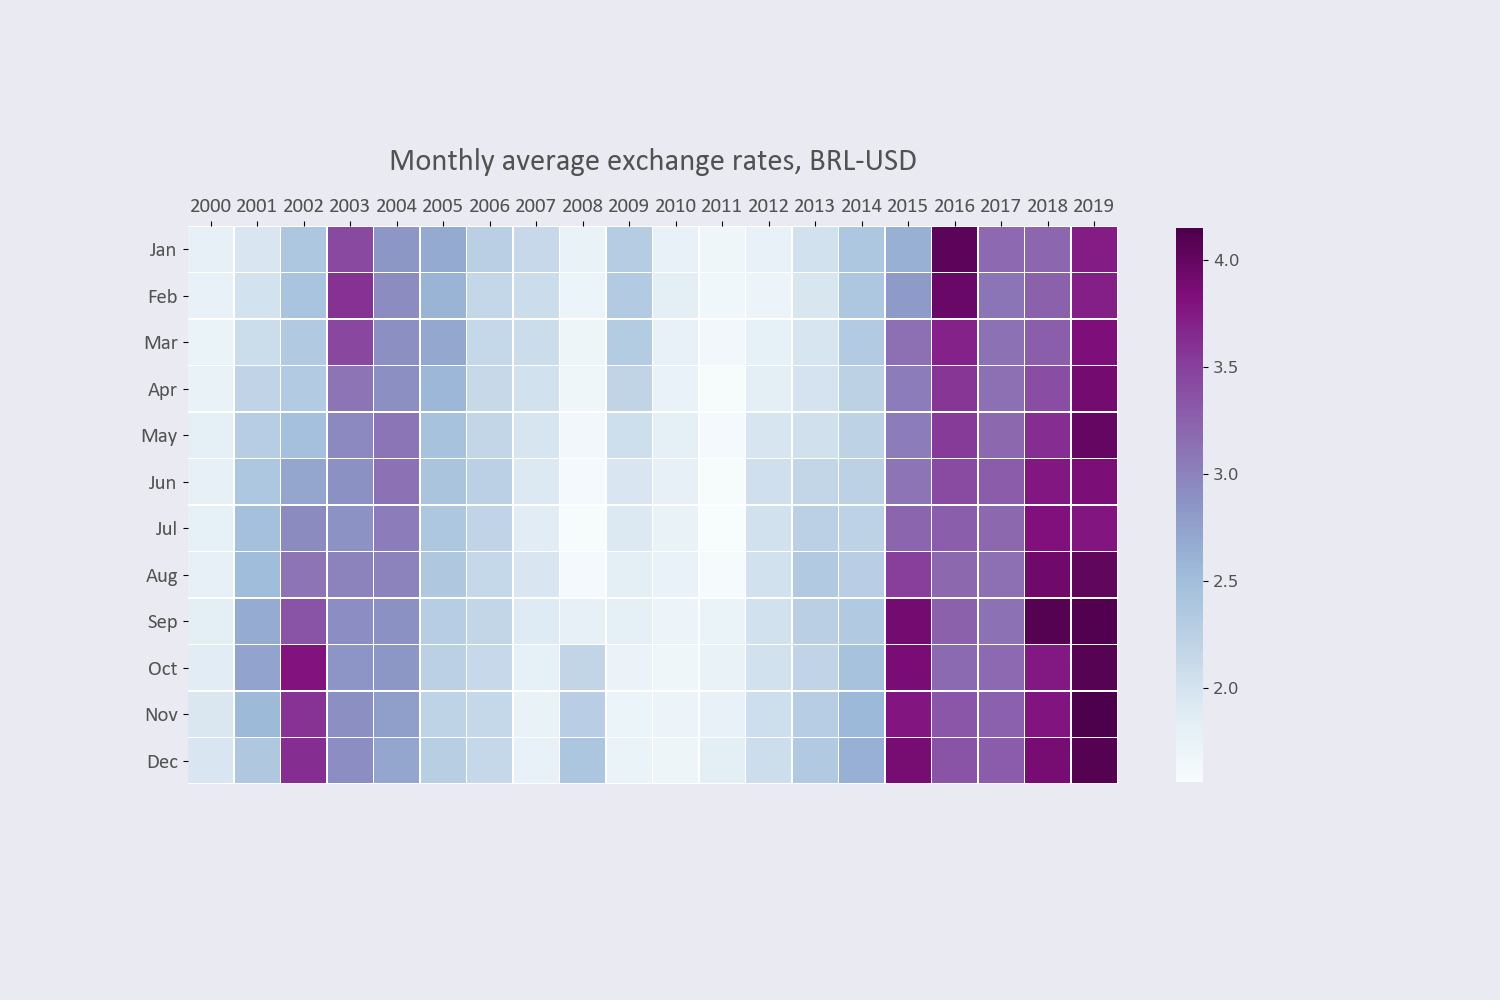

In [8]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'

fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)

sns.heatmap(df_m, 
            cmap='BuPu', 
            vmin=1.56, 
            vmax=4.15, 
            square=True,
            linewidth=0.3, 
            cbar_kws={'shrink': .72}, 
#           annot=True, 
#           fmt='.1f'
           )

ax.xaxis.tick_top()
yticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(np.arange(12) + .5, labels=yticks_labels)

plt.xlabel('')
plt.ylabel('')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=15, color=font_color, **hfont)

title = 'Monthly average exchange rates, BRL-USD'
plt.title(title, fontsize=22, pad=20, color=font_color, **hfont)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12, labelcolor=font_color)

In [ ]:
filename = 'sns-heatmap'
plt.savefig(filename+'.png', facecolor=facecolor)